In [ ]:
Alunos: Gilmar bui ferrini júnior, Mateus Veloso de Carvalho e João Vitor Oliveira Sarmento

In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [18]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

    5     1     6     1


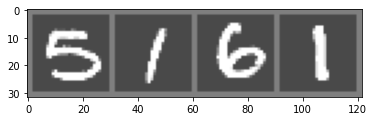

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [40]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x


net = Net()

In [41]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

In [42]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.224
[1,  4000] loss: 1.509
[1,  6000] loss: 1.180
[1,  8000] loss: 1.096
[1, 10000] loss: 1.083
[1, 12000] loss: 1.070
[1, 14000] loss: 1.066
[2,  2000] loss: 0.902
[2,  4000] loss: 0.700
[2,  6000] loss: 0.644
[2,  8000] loss: 0.565
[2, 10000] loss: 0.341
[2, 12000] loss: 0.162
[2, 14000] loss: 0.139
[3,  2000] loss: 0.124
[3,  4000] loss: 0.109
[3,  6000] loss: 0.113
[3,  8000] loss: 0.100
[3, 10000] loss: 0.100
[3, 12000] loss: 0.098
[3, 14000] loss: 0.085
[4,  2000] loss: 0.085
[4,  4000] loss: 0.082
[4,  6000] loss: 0.066
[4,  8000] loss: 0.084
[4, 10000] loss: 0.077
[4, 12000] loss: 0.075
[4, 14000] loss: 0.071
[5,  2000] loss: 0.066
[5,  4000] loss: 0.066
[5,  6000] loss: 0.068
[5,  8000] loss: 0.062
[5, 10000] loss: 0.058
[5, 12000] loss: 0.054
[5, 14000] loss: 0.069
Finished Training


5. Testando a rede em dados de teste:
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Treinamos a rede por 2 épocas. Temos que checar se ela aprendeu:



GroundTruth:      7     0     2     0


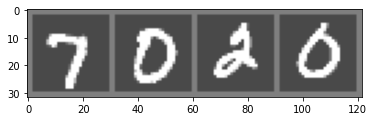

In [43]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


Ok, agora vamos ver o que a rede neural pensa que esses exemplos acima são:

In [44]:
outputs = net(images)

In [45]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:      7     0     2     0
